In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

In [4]:
df = pd.read_csv("startup")
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [5]:
# Pré-processamento dos dados
df['status'] = df['status'].map({'acquired': 1, 'closed': 0}).astype(int)
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

In [6]:
# Remover outliers
Q1 = df['funding_total_usd'].quantile(0.25)
Q3 = df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['funding_total_usd'] >= Q1 - 1.5 * IQR) & (df['funding_total_usd'] <= Q3 + 1.5 * IQR)]

In [9]:
# Criar novas características
df.loc[:, 'tem_RodadaABCD'] = ((df['has_roundA'] == 1) | (df['has_roundB'] == 1) |
                               (df['has_roundC'] == 1) | (df['has_roundD'] == 1)).astype(int)
df.loc[:, 'tem_Investidor'] = ((df['has_VC'] == 1) | (df['has_angel'] == 1)).astype(int)
df.loc[:, 'tem_Semente'] = ((df['tem_RodadaABCD'] == 0) & (df['tem_Investidor'] == 1)).astype(int)


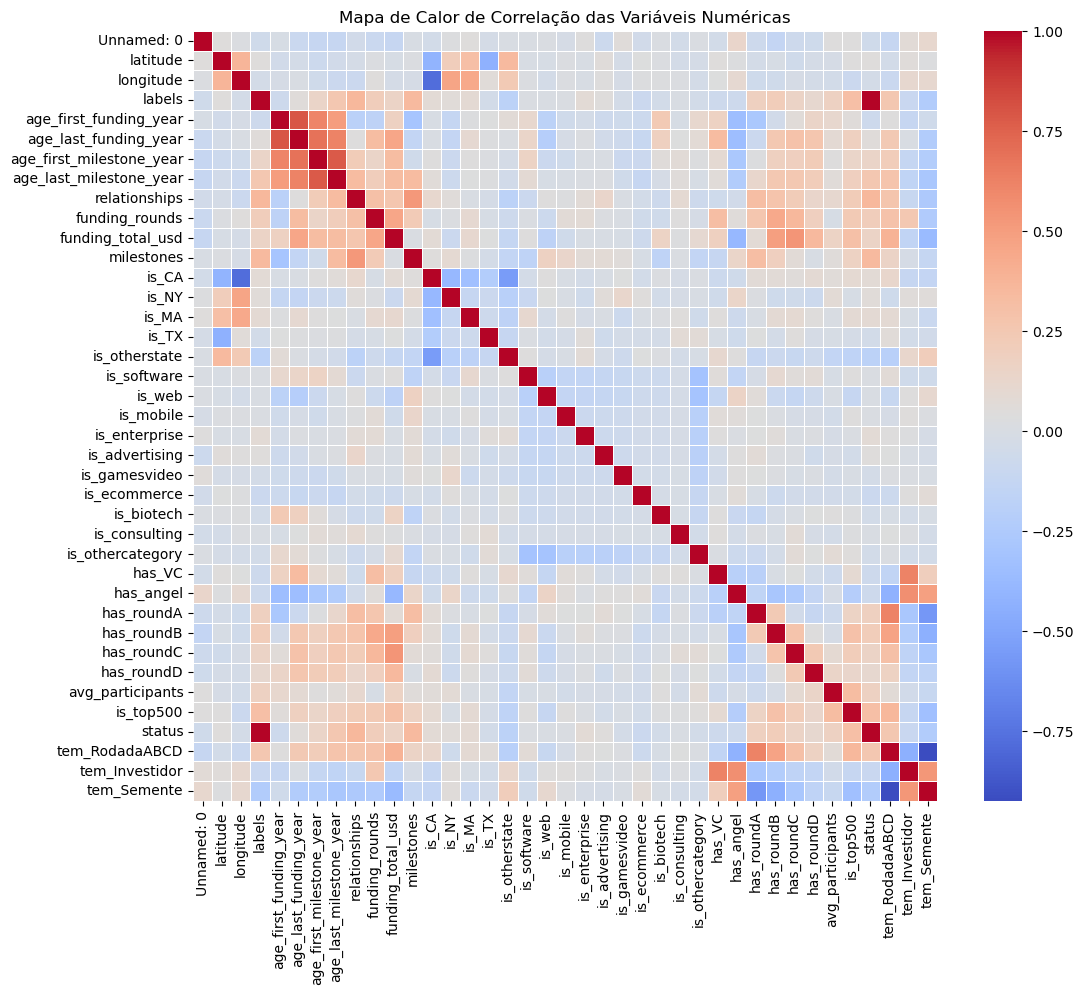

In [10]:
# Visualização 1: Mapa de Calor de Correlação
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Mapa de Calor de Correlação das Variáveis Numéricas')
plt.show()

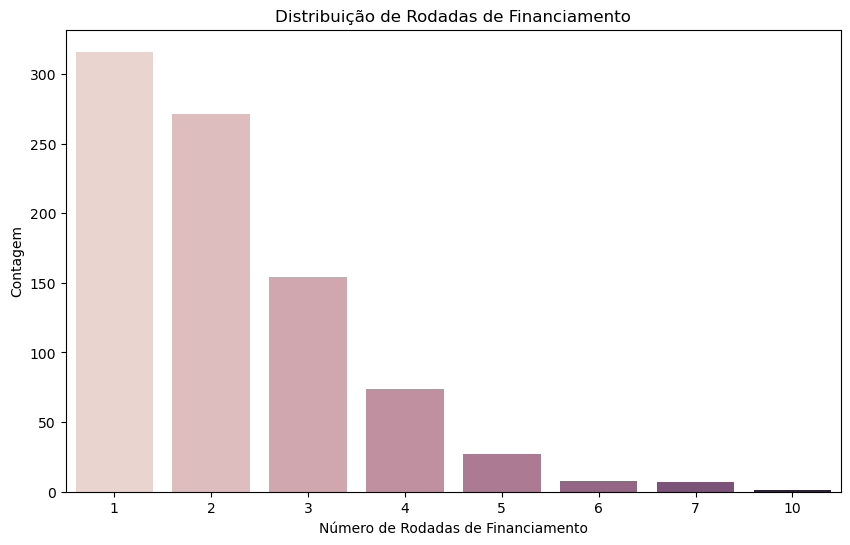

In [12]:
# Visualização 2: Distribuição de Rodadas de Financiamento
plt.figure(figsize=(10, 6))
sns.countplot(x='funding_rounds', hue='funding_rounds', data=df, legend=False)
plt.title('Distribuição de Rodadas de Financiamento')
plt.xlabel('Número de Rodadas de Financiamento')
plt.ylabel('Contagem')
plt.show()

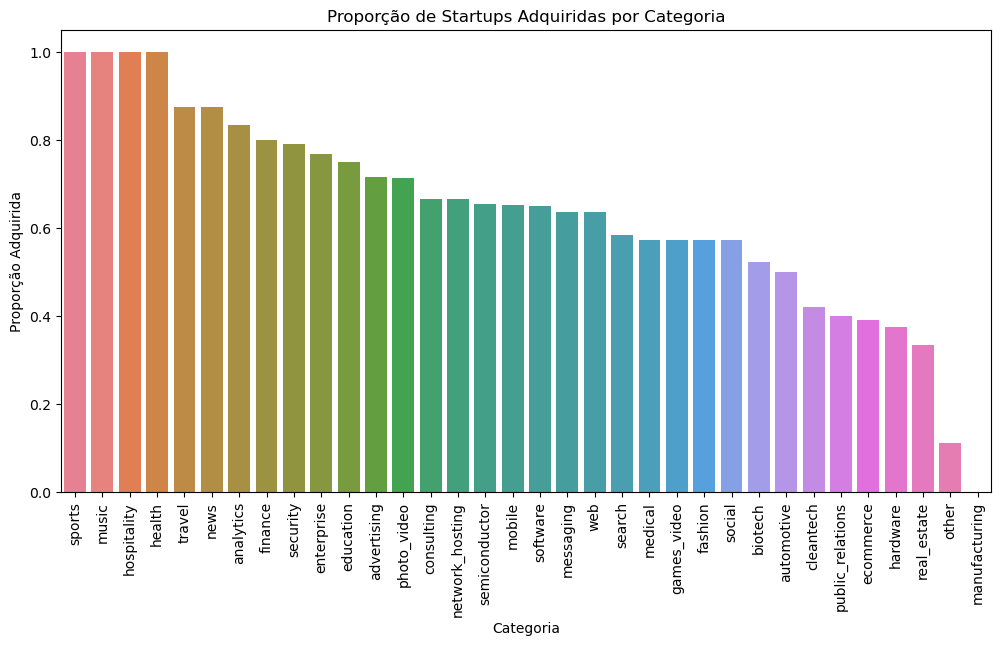

In [14]:
# Visualização 3: Status da Startup por Categoria
plt.figure(figsize=(12, 6))
categoria_status = df.groupby('category_code')['status'].mean().sort_values(ascending=False)
sns.barplot(x=categoria_status.index, y=categoria_status.values, hue=categoria_status.index, legend=False)
plt.title('Proporção de Startups Adquiridas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Proporção Adquirida')
plt.xticks(rotation=90)
plt.show()

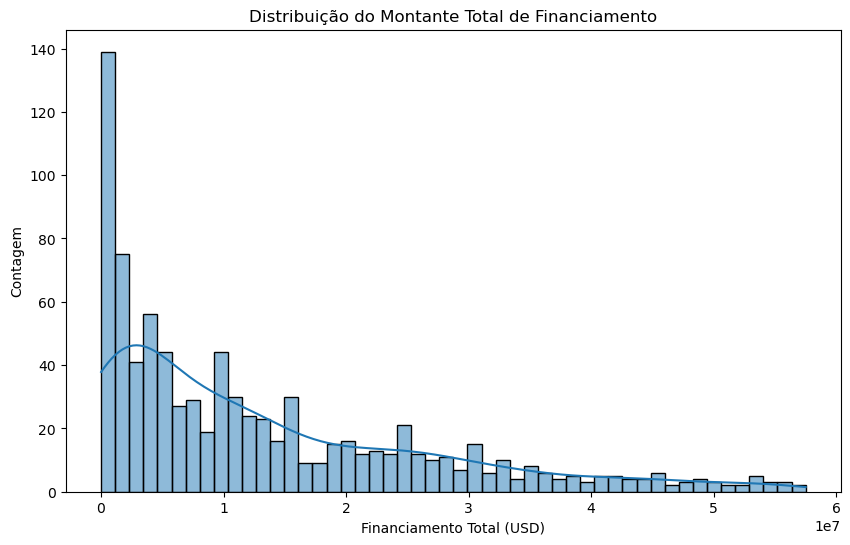

In [15]:
# Visualização 4: Distribuição do Montante de Financiamento
plt.figure(figsize=(10, 6))
sns.histplot(df['funding_total_usd'], bins=50, kde=True)
plt.title('Distribuição do Montante Total de Financiamento')
plt.xlabel('Financiamento Total (USD)')
plt.ylabel('Contagem')
plt.show()

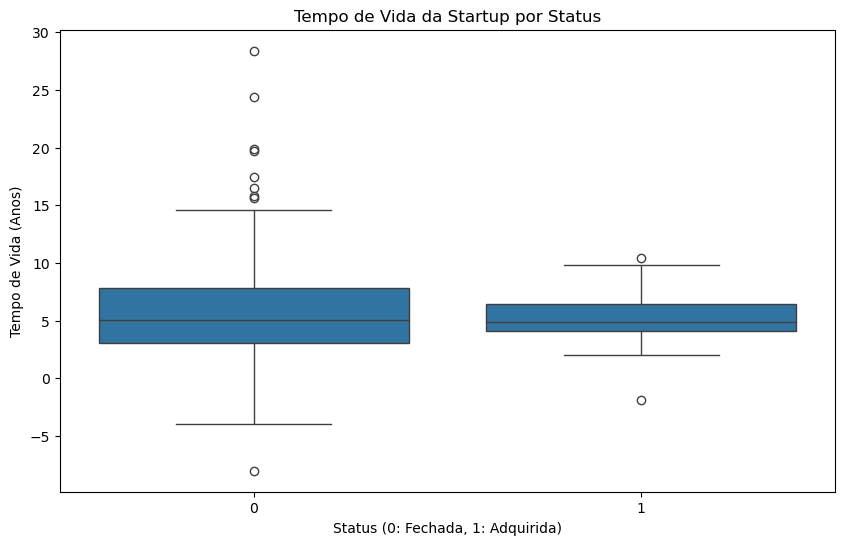

In [19]:
# Visualização 5: Tempo de Vida da Startup
df.loc[:, 'tempo_vida'] = (df['closed_at'] - df['founded_at']).dt.days / 365.25
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='tempo_vida', data=df)
plt.title('Tempo de Vida da Startup por Status')
plt.xlabel('Status (0: Fechada, 1: Adquirida)')
plt.ylabel('Tempo de Vida (Anos)')
plt.show()